Calculate Kuiper metric for a given cadence for each point of the sky.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

from simcodes.fitters import ExtendedLS
from gatspy.periodic import LombScargleMultiband
from KuiperMetric import KuiperVS
from datetime import datetime

In [4]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
conn = maf.db.OpsimDatabase(baseline_file)

outDir = datetime.today().strftime('%d_%m_%Y_')+'magLimsMultiShort'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [5]:
# Same for short cadence
shortDbFile = '/home/alex/rubin_sim_data/multi_short_v2.0_10yrs.db'
shortName = os.path.split(shortDbFile)[-1].replace('.db', '')
shortDb = maf.db.OpsimDatabase(shortDbFile)
resultsDbShort = maf.db.ResultsDb(outDir=outDir)
print(shortName)

multi_short_v2.0_10yrs


In [6]:
# Set range of periods for which we're gonna build the maps
start=0.1
numPoints=500
totalObsLength=365*5

periods=np.round(np.geomspace(start,totalObsLength,numPoints),4)
magLims=[23,23.5,24]

results={}
resultsShort={}

for mag in magLims:
    results[mag]=[]
    resultsShort[mag]=[]
    
summary_metrics = [maf.MedianMetric()]
sql = ''
nside=2**5 # for HealpixSlicer
slicer = maf.HealpixSlicer(nside=nside)
for p in periods:
    for mag in magLims:
        metric = KuiperVS(period=p,starMags=[mag]*6)
        
        results[mag].append(maf.MetricBundle(metric, slicer, sql, summaryMetrics=summary_metrics, 
                                           runName='KuiperMedian_'+str(p)))
        
        resultsShort[mag].append(maf.MetricBundle(metric, slicer, sql, summaryMetrics=summary_metrics, 
                                               runName='ShortKuiperMedian_'+str(p)))

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


In [7]:
for mag in magLims:
    bd = maf.metricBundles.makeBundlesDictFromList(results[mag])
    bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()

Querying database observations with no constraint for columns ['fiveSigmaDepth', 'observationStartMJD', 'fieldRA', 'filter', 'fieldDec', 'rotSkyPos'].
Found 2086980 visits
Running:  ['KuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1194_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1217_KuiperVS_obs

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fiveSigmaDepth', 'observationStartMJD', 'fieldRA', 'filter', 'fieldDec', 'rotSkyPos'].
Found 2086980 visits
Running:  ['KuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1194

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fiveSigmaDepth', 'observationStartMJD', 'fieldRA', 'filter', 'fieldDec', 'rotSkyPos'].
Found 2086980 visits
Running:  ['KuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1194

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [8]:
for mag in magLims:
    bd = maf.metricBundles.makeBundlesDictFromList(resultsShort[mag])
    bg = maf.metricBundles.MetricBundleGroup(bd, shortDb, outDir=outDir, resultsDb=resultsDbShort)
    bg.runAll()

Querying database observations with no constraint for columns ['fiveSigmaDepth', 'observationStartMJD', 'fieldRA', 'filter', 'fieldDec', 'rotSkyPos'].
Found 3584186 visits
Running:  ['ShortKuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1194_KuiperVS_observationStartMJD_filter_fiveS

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fiveSigmaDepth', 'observationStartMJD', 'fieldRA', 'filter', 'fieldDec', 'rotSkyPos'].
Found 3584186 visits
Running:  ['ShortKuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_117_KuiperVS_observationStartMJD_filt

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fiveSigmaDepth', 'observationStartMJD', 'fieldRA', 'filter', 'fieldDec', 'rotSkyPos'].
Found 3584186 visits
Running:  ['ShortKuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'ShortKuiperMedian_0_117_KuiperVS_observationStartMJD_filt

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [9]:
getMedianDict=lambda bList:[(float(p.runName.split('_')[1]),round(p.summaryValues['Median'],3)) for p in bList]
periods={}
periodsShort={}
for mag in magLims:
    periods[mag]=pd.DataFrame(columns=['period','median Kuiper value'],data=getMedianDict(results[mag]))
    periodsShort[mag]=pd.DataFrame(columns=['period','median Kuiper value'],data=getMedianDict(resultsShort[mag]))

Text(0, 0.5, 'Median Kuiper metric')

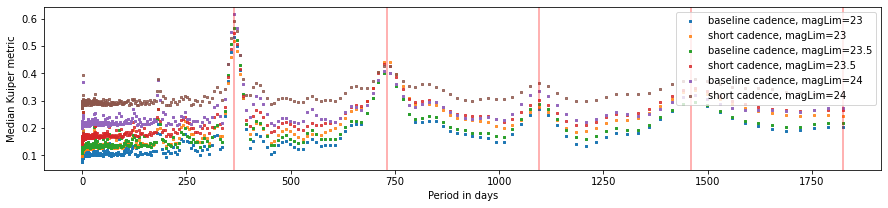

In [19]:
fig,ax=plt.subplots(1,1,figsize=(15,3))
for mag in magLims:
    ax.scatter(periods[mag]['period'],periods[mag]['median Kuiper value'],
               s=8,label='baseline cadence, magLim='+str(mag),marker='s')
    ax.scatter(periodsShort[mag]['period'],periodsShort[mag]['median Kuiper value'],marker='s',
               s=8,alpha=0.8,label='short cadence, magLim='+str(mag))
i=0
while i<totalObsLength:
    i+=365
    ax.axvline(i,color='r',alpha=0.4)
ax.legend()
ax.set_xlabel('Period in days')
ax.set_ylabel('Median Kuiper metric')

Text(0, 0.5, 'Median Kuiper metric')

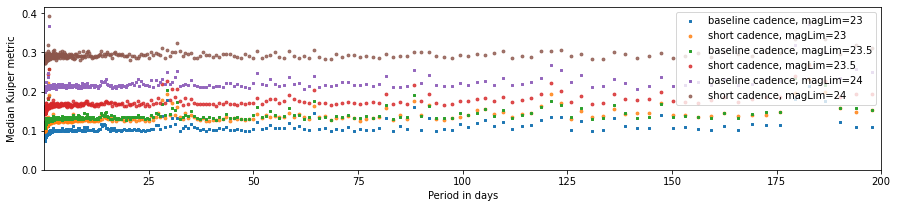

In [21]:
fig,ax=plt.subplots(1,1,figsize=(15,3))
for mag in magLims:
    ax.scatter(periods[mag]['period'],periods[mag]['median Kuiper value'],
               s=8,label='baseline cadence, magLim='+str(mag),marker='s')
    ax.scatter(periodsShort[mag]['period'],periodsShort[mag]['median Kuiper value'],marker='o',
               s=8,alpha=0.8,label='short cadence, magLim='+str(mag))
    ax.set_xlim(0.001,200)
    ax.set_ylim(0,max(list(periods[mag]['median Kuiper value'])[:200])+0.05)
i=0
while i<200:
    i+=365
    ax.axvline(i,color='r',alpha=0.4)
ax.legend()
ax.set_xlabel('Period in days')
ax.set_ylabel('Median Kuiper metric')

Text(0, 0.5, 'Median Kuiper metric')

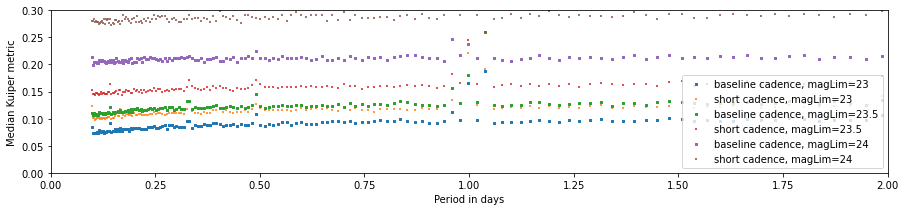

In [23]:
fig,ax=plt.subplots(1,1,figsize=(15,3))
for mag in magLims:
    ax.scatter(periods[mag]['period'],periods[mag]['median Kuiper value'],
               s=8,label='baseline cadence, magLim='+str(mag),marker='s')
    ax.scatter(periodsShort[mag]['period'],periodsShort[mag]['median Kuiper value'],marker='+',
               s=8,alpha=0.8,label='short cadence, magLim='+str(mag))
    ax.set_xlim(0,2)
    ax.set_ylim(0,max(list(periodsShort[mag]['median Kuiper value'])[:2])+0.02)

ax.legend()
ax.set_xlabel('Period in days')
ax.set_ylabel('Median Kuiper metric')

In [24]:
cadenceComparison={}
for mag in magLims:
    cadenceComparison[mag]=pd.DataFrame(columns=['period min','period max',
                                            'baseline median Kuiper','short median Kuiper','base-short'])

    baseKuiper=periods[mag][(periods[mag]['period']>0.1) & 
                                        (periods[mag]['period']<=1)]['median Kuiper value'].median().round(5)
    shortKuiper=periodsShort[mag][(periodsShort[mag]['period']>0.1) & 
                                        (periodsShort[mag]['period']<=1)]['median Kuiper value'].median().round(5)
    d={'period min':0.1,'period max':1,
          'baseline median Kuiper':baseKuiper,
          'short median Kuiper':shortKuiper,
          'base-short':baseKuiper-shortKuiper}
    cadenceComparison[mag]=cadenceComparison[mag].append(d,ignore_index=True)

    for i in range(1,totalObsLength,365):
        baseKuiper=periods[mag][(periods[mag]['period']>i) & 
                                        (periods[mag]['period']<=i+365)]['median Kuiper value'].median().round(5)
        shortKuiper=periodsShort[mag][(periodsShort[mag]['period']>i) & 
                                        (periodsShort[mag]['period']<=i+365)]['median Kuiper value'].median().round(5)
        
        d={'period min':i,'period max':i+365,
          'baseline median Kuiper':baseKuiper,
          'short median Kuiper':shortKuiper,
          'base-short':baseKuiper-shortKuiper}
        cadenceComparison[mag]=cadenceComparison[mag].append(d,ignore_index=True)

In [25]:
cadenceComparison[23]

,period min,period max,baseline median Kuiper,short median Kuiper,base-short
0,0.1,1.0,0.0870,0.1110,-0.024
1,1.0,366.0,0.1030,0.1290,-0.026
2,366.0,731.0,0.1520,0.1970,-0.045
3,731.0,1096.0,0.2160,0.2570,-0.041
4,1096.0,1461.0,0.1815,0.2295,-0.048
5,1461.0,1826.0,0.2045,0.2585,-0.054


In [26]:
cadenceComparison[23.5]

,period min,period max,baseline median Kuiper,short median Kuiper,base-short
0,0.1,1.0,0.1200,0.1550,-0.0350
1,1.0,366.0,0.1340,0.1690,-0.0350
2,366.0,731.0,0.1830,0.2230,-0.0400
3,731.0,1096.0,0.2340,0.2780,-0.0440
4,1096.0,1461.0,0.1975,0.2520,-0.0545
5,1461.0,1826.0,0.2190,0.2745,-0.0555


In [27]:
cadenceComparison[24]

,period min,period max,baseline median Kuiper,short median Kuiper,base-short
0,0.1,1.0,0.2100,0.2840,-0.0740
1,1.0,366.0,0.2160,0.2925,-0.0765
2,366.0,731.0,0.2570,0.3180,-0.0610
3,731.0,1096.0,0.2770,0.3390,-0.0620
4,1096.0,1461.0,0.2505,0.3235,-0.0730
5,1461.0,1826.0,0.2695,0.3445,-0.0750
